<a href="https://colab.research.google.com/github/BLayus/Data_Folia/blob/main/Regress%C3%A3o_%C3%A9_Quase_Amor_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Motivação**
A cerveja é uma das bebidas mais democráticas e consumidas do mundo. Não sem razão, é perfeito para quase todas as situações, desde happy hour até grandes festas de casamento. Se você só pensar nisso, você já sente vontade de tomar uma cerveja, você não está sozinho. A verdade é que em todo o mundo, milhares de pessoas consomem a bebida regularmente e também em diferentes situações. Mas você já parou para pensar em quais países são os que mais consomem cerveja no mundo? A primeira que lhe veio à cabeça foi a Alemanha? Bem, saiba que não é assim. A resposta a essa pergunta é retumbante: a República Tcheca. Segundo pesquisa da empresa japonesa de bebidas Kirin, o país lidera a tabela de consumo de cerveja per capita por 23 anos consecutivos. Em 2015, o ano mais recente para o qual existem estatísticas disponíveis, os tchecos beberam 142,4 litros por pessoa. Isso é o equivalente a 250 canecas—ou uma a cada 35 horas. Mas, dado que é improvável que os menores contribuam para esse número, é seguro supor que o bebedor médio de cerveja provavelmente bebe um pouco mais. Áustria e Alemanha vêm em terceiro e quarto, Polônia em sexto e Irlanda em sétimo. No entanto, há algumas surpresas. Em segundo lugar estão as Seychelles, uma classificação elevada que atribuímos ao clima quente e ao grande número de turistas.

##**Otimizando a venda de cervejas no Carnaval 2022 (se ele existisse)**
Coletamos alguns dados de São Paulo—Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos (média) para desenvolver um estudo e precisamos da sua ajuda: Se existisse um carnaval? E eu quisesse escolher o melhor dia para vender cervejas em SP, qual dos dias abaixo você sugeriria e por que?



1.   27/02/2022
2.   28/02/2022
3.   01/03/2022
4.   02/03/2022

Plus: Se pudesse indicar o melhor bairro de SP para vender cervejas no dia apontado por vc, qual seria? Justifique sua resposta com argumentos e dados.

##**Importando e Montando Dataset**

In [1]:
# Importando Bibliotecas

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [2]:
# Montando no drive e lendo o dataset consumo_cerveja.csv

from google.colab import drive
drive.mount('/content/drive')
cons_cerv = pd.read_csv('/content/drive/MyDrive/consumo_cerveja.csv')

Mounted at /content/drive


In [3]:
# O dataset possui 941 linhas, mas possui varios NaN (not a number), registros vazios

cons_cerv

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Através do info() podemos constatar que são apenas 365 registros completos
# Os tipos de dados também não estão corretos, será preciso trocar Data por Datetime, as colunas de temperatura e precipitação de object para float64
cons_cerv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


##**Tratamento Inicial dos Dados**

In [5]:
# Apagar as linhas nulas

cons_cerv.dropna(axis=0, how='all', inplace=True)

In [6]:
# Substituir virgulas por ponto...

cons_cerv['Temperatura Media (C)'] = cons_cerv['Temperatura Media (C)'].str.replace(',', '.')
cons_cerv['Temperatura Minima (C)'] = cons_cerv['Temperatura Minima (C)'].str.replace(',', '.')
cons_cerv['Temperatura Maxima (C)'] = cons_cerv['Temperatura Maxima (C)'].str.replace(',', '.')
cons_cerv['Precipitacao (mm)'] = cons_cerv['Precipitacao (mm)'].str.replace(',', '.')

In [7]:
# Vou converter as colunas para os formatos de dados

cons_cerv['Temperatura Media (C)'] = cons_cerv['Temperatura Media (C)'].astype(float)
cons_cerv['Temperatura Minima (C)'] = cons_cerv['Temperatura Minima (C)'].astype(float)
cons_cerv['Temperatura Maxima (C)'] = cons_cerv['Temperatura Maxima (C)'].astype(float)
cons_cerv['Precipitacao (mm)'] = cons_cerv['Precipitacao (mm)'].astype(float)

# Converter a coluna Data para Datetime
cons_cerv['Data'] = pd.to_datetime(cons_cerv['Data'])

In [8]:
cons_cerv.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [9]:
cons_cerv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 22.8 KB


In [10]:
# Os campos estão sem vírgulas e os dtypes estão corretos

##**Feature Engineering**

In [11]:
# Extrair o máximo de informações relevantes para o modelo de regressão usando a coluna Final de Semana 
# Aproveitar o campo data no formato datetime para usar as informações de weekday
# Criando colunas com mes, dia e weekday

cons_cerv['dia_semana'] = cons_cerv['Data'].apply(lambda x: x.weekday())
print('Dia da Semana OK!', '\n')

cons_cerv['mes'] = cons_cerv['Data'].apply(lambda x: x.month)
print('Mês OK!', '\n')

cons_cerv['dia'] = cons_cerv['Data'].apply(lambda x: x.day)
print('Dia OK!', '\n')


Dia da Semana OK! 

Mês OK! 

Dia OK! 



In [12]:
# Criar uma coluna com os nomes dos dias da semana

cons_cerv['nome_dia'] = cons_cerv['dia_semana'].replace({0:'segunda', 1:'terça', 2:'quarta', 
                                                         3:'quinta', 4:'sexta', 5:'sabado', 6:'domingo'})

In [13]:
# Criar uma coluna com uma nova feature para amplitude térmica, a diferença entre a Temp máxima e a mínima

cons_cerv['Amp Termica'] = cons_cerv['Temperatura Maxima (C)'] - cons_cerv['Temperatura Minima (C)']

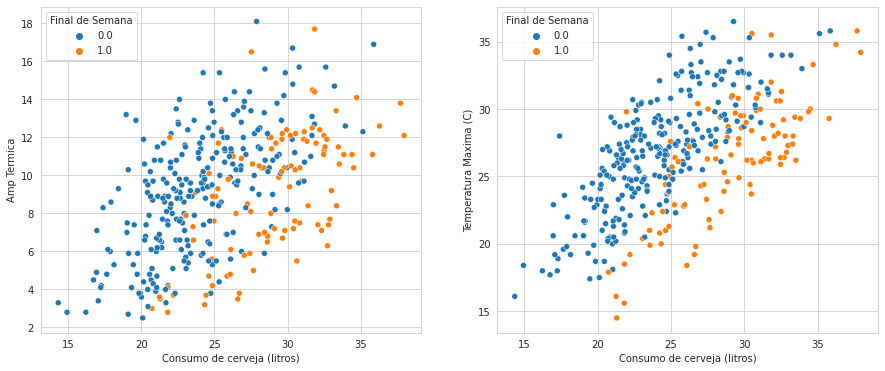

In [18]:
# Plotar um gráfico para avaliar a importância da feature Amplitude Térmica

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(15,6), sharex= True)

ax0 = sns.scatterplot('Consumo de cerveja (litros)', 'Amp Termica', hue='Final de Semana', data=cons_cerv, ax=ax[0])
ax1 = sns.scatterplot('Consumo de cerveja (litros)', 'Temperatura Maxima (C)', hue='Final de Semana', data=cons_cerv, ax=ax[1])

plt.show()


A distribuição dos dados no gráfico que relaciona amplitude térmica (fig. à
esquerda) evidencia o maior consumo de cerveja aos finais de semana e também mostra que o consumo tende a ser maior conforme aumenta a amplitude térmica.

O gráfico que relaciona os dados de consumo X temperatura máxima (fig. à direita) mostra uma correlação ainda maior entre o aumento da temperatura e o maior consumo de cerveja. A distribuição dos dados deste gráfico se apresenta mais centralizada em relação à linha de regressão, os pontos estão mais próximos entre si, o que demonstra que esta variável preditora é ainda mais importante.

Ainda, aos finais de semana o consumo tende a ser maior (pontos laranjas).

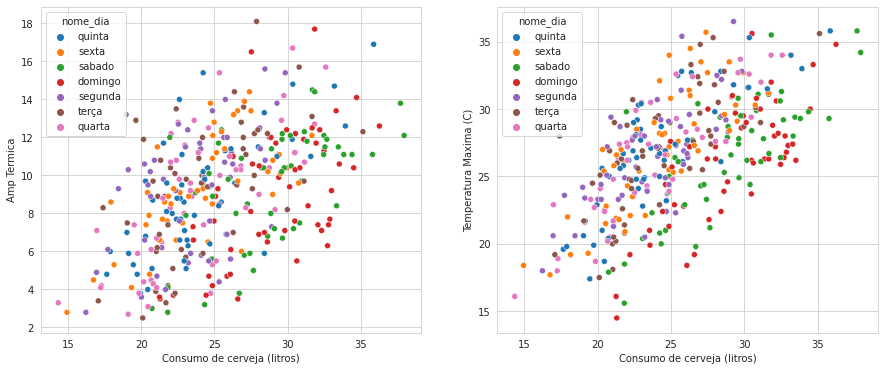

In [22]:
# Quero olhar para outros dias da semana e saber se possuem relação com o aumento do consumo de cerveja

fig, ax = plt.subplots(1, 2, figsize=(15,6), sharex= True)

ax0 = sns.scatterplot('Consumo de cerveja (litros)', 'Amp Termica', hue='nome_dia', data=cons_cerv, ax=ax[0])
ax1 = sns.scatterplot('Consumo de cerveja (litros)', 'Temperatura Maxima (C)', hue='nome_dia', data=cons_cerv, ax=ax[1])

plt.show()

*   Pontos vermelhos e verdes, representam final de semana: Já sabemos que o consumo nestes dias tende a ser maior.
*   Pontos laranjas, representam sexta feira: Contrário ao senso comum, sexta feira não empolga tanto quando o tema é consumo de cerveja.
*   Pontos rosa e lilás, respectivamente segunda e quarta: São dias em que há consumo, mas não muito alto, apenas aquela cervejinha no final do dia.
*   Pontos marrons, representam terça feira: São poucos dados e o consumo não é elevado. Parece que este é o pior dia pra vender cerveja.

In [24]:
# Inserção manual dos dados dos dias do carnaval em um dataset para teste
# Data	Temperatura Media (C)	Temperatura Minima (C)	Temperatura Maxima (C)	Precipitacao (mm)	Final de Semana	
# Consumo de cerveja (litros)	dia_semana mes dia nome_dia

cons_cerv_predict = cons_cerv.append(pd.DataFrame([
                                           ['2022-02-27 00:00:00', 24.60, 19.8, 31.4, 0.0, 1.0, np.NaN , 5, 2, 27, 'sabado', 11.6],
                                           ['2022-02-28 00:00:00', 26.20, 20.6, 32.9, 0.0, 1.0, np.NaN , 6, 2, 28, 'domingo', 12.3],
                                           ['2022-03-01 00:00:00', 25.62, 23.2, 31.6, 0.0, 1.0, np.NaN , 0, 3, 1, 'segunda', 8.4],
                                           ['2022-03-02 00:00:00', 24.75, 20.0, 31.7, 7.2, 1.0, np.NaN , 1, 3, 2, 'terça', 11.7]],
                                           columns=cons_cerv.columns), ignore_index=True)


In [25]:
# para aplicar o modelo de ML, precisarei substituir estes NaN por algum valor, vou utilizar média

y_mean = cons_cerv_predict['Consumo de cerveja (litros)'].mean()

cons_cerv_predict['Consumo de cerveja (litros)'] = cons_cerv_predict['Consumo de cerveja (litros)'].replace(np.NaN, y_mean)

In [26]:
# fiz uma cópia do dataset incluindo as linhas adicionadas para previsão

cons_cerv_predict.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),dia_semana,mes,dia,nome_dia,Amp Termica
364,2015-12-31 00:00:00,24.76,20.2,29.0,0.0,0.0,22.446000,3,12,31,quinta,8.8
365,2022-02-27 00:00:00,24.60,19.8,31.4,0.0,1.0,25.401367,5,2,27,sabado,11.6
366,2022-02-28 00:00:00,26.20,20.6,32.9,0.0,1.0,25.401367,6,2,28,domingo,12.3
367,2022-03-01 00:00:00,25.62,23.2,31.6,0.0,1.0,25.401367,0,3,1,segunda,8.4
368,2022-03-02 00:00:00,24.75,20.0,31.7,7.2,1.0,25.401367,1,3,2,terça,11.7


In [27]:
# Aqui ficou o dataset original
cons_cerv.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),dia_semana,mes,dia,nome_dia,Amp Termica
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,3,1,1,quinta,8.6
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,4,1,2,sexta,9.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,5,1,3,sabado,7.5
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,6,1,4,domingo,7.1
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,0,1,5,segunda,7.3


##**Analisando Matriz de Correlação**

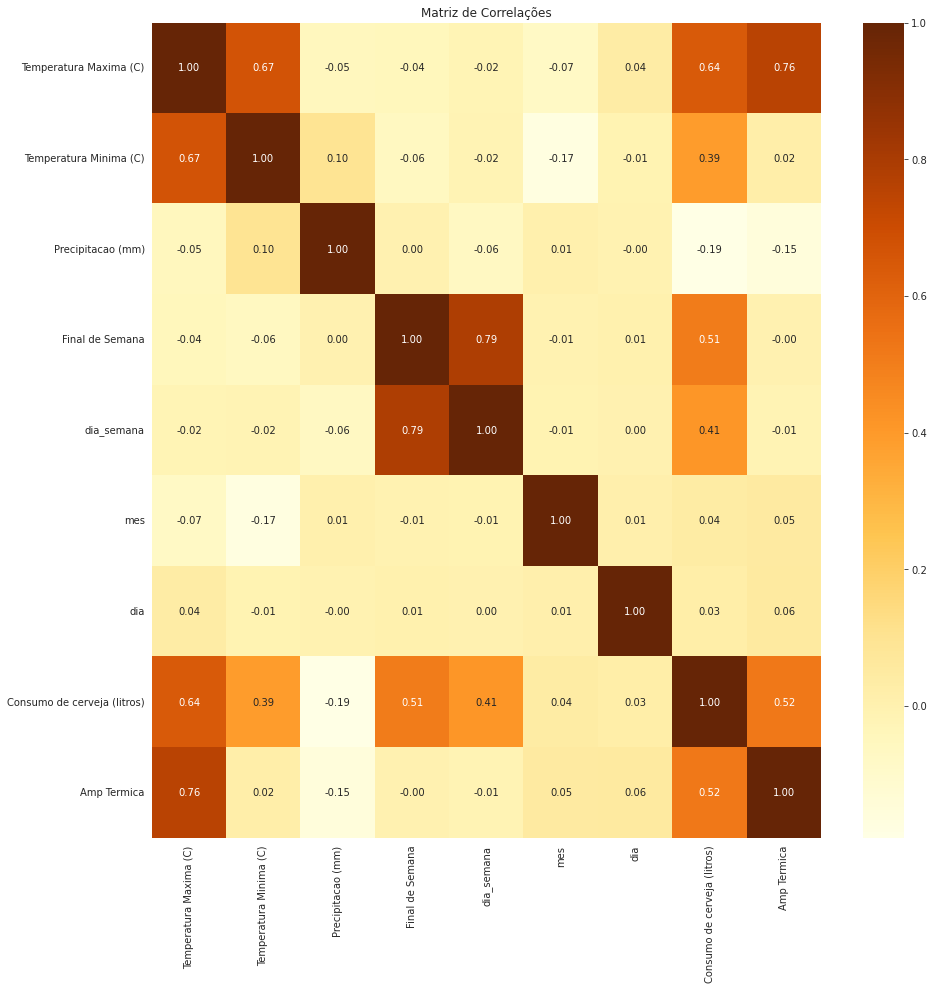

In [28]:
# Usando Matriz de correlação através de Seaborn heat map

col_corr = cons_cerv[['Temperatura Maxima (C)', 'Temperatura Minima (C)', 'Precipitacao (mm)', 'Final de Semana', 
                      'dia_semana', 'mes', 'dia', 'Consumo de cerveja (litros)', 'Amp Termica']]
plt.figure(figsize=(15, 15))
plt.title('Matriz de Correlações')
sns.heatmap(col_corr.corr(), annot=True, fmt='.2f', cmap='YlOrBr')
plt.show()

**Quais as features mais importantes?**

Através da matriz de correlações, podemos constatar que as variáveis mais importantes, em ordem decrescente são: Temperatura Máxima, Amplitude Térmica,  Final de Semana, Temperatura Mínima e Dia da Semana.

Estas variáveis serão utilizadas em conjunto ou separadamente nos métodos de regressão a seguir.

##**Definindo Funções para Avaliar os Resultados**

In [29]:
# Criando uma função para avaliar o erro R2, MAE, MSE e RMSE
Y = cons_cerv['Consumo de cerveja (litros)']

def evaluate(Y, Y_predict):
  distplot(Y, Y_predict)
  residplot(Y, Y_predict)
  print('R2: ', r2_score(Y, Y_predict))
  print('MAE: ', mean_absolute_error(Y, Y_predict))
  print('MSE: ', mean_squared_error(Y, Y_predict))
  print('RMSE: ', np.sqrt(mean_squared_error(Y, Y_predict)))

In [30]:
# Criando uma função para plotar o gráfico de distribuição
# Quanto melhor a curva predict fitar à curva real, melhor o modelo

def distplot(Y, Y_predict):
  axl=sns.distplot(Y, hist=False, color='r', label='Valor Real')
  sns.distplot(Y_predict, hist=False, ax=axl, color='b', label='Valor Previsão')
  plt.legend()
  plt.show()

In [31]:
# Criando uma função para plotar o gráfico de resíduos
# Gráfico de resíduos ideal deve ter os valores próximos de 0, da linha tracejada
# Gráfico de resíduos bom é quando os pontos estão randômicos, bem distribuídos

def residplot(Y, Y_predict):
  sns.residplot(Y, Y_predict)
  plt.title('Resíduos')
  plt.ylabel('Erro')

##**Regressão Linear Simples**

In [32]:
# Vou utilizar a variável que a matriz de correlação aponta como mais relacionado à predição do consumo de cerveja
# Esta variável é a temperatura máxima, porém a correlação é de apenas 0.64
# A segunda correlação mais forte é com a coluna final de semana, com 0.51

X= cons_cerv[['Temperatura Maxima (C)']]
Y= cons_cerv[['Consumo de cerveja (litros)']]

lm = LinearRegression()

lm.fit(X, Y)

lm.intercept_
lm.coef_

Y_predictlm = lm.predict(X)


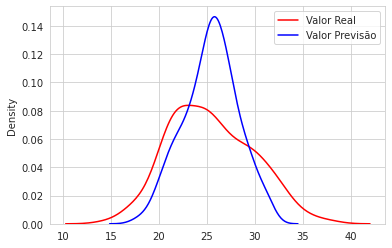

R2:  0.413027909953363
MAE:  2.7642672738837044
MSE:  11.328230341613486
RMSE:  3.3657436535799166


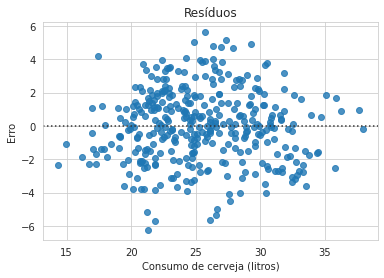

In [33]:
evaluate(Y, Y_predictlm)

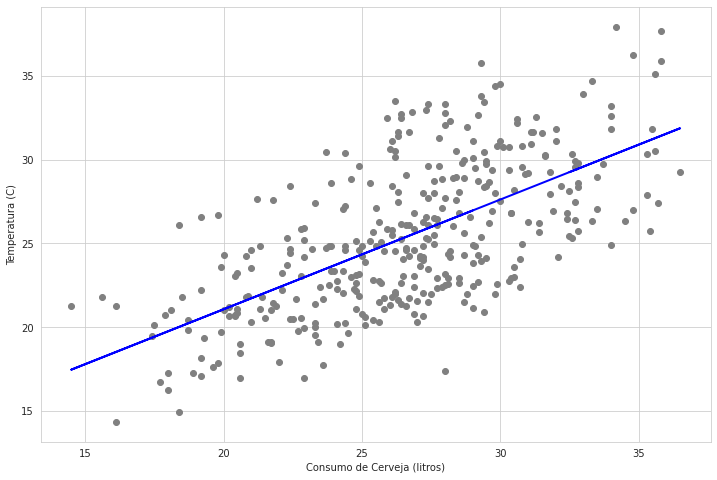

In [34]:
# Vou usar um grafico tipo scatter plot associado à reta de regressão para olharmos para a regressão linear simples 
# usando a temperatura máxima

plt.figure(figsize=(12, 8))
plt.scatter(cons_cerv['Temperatura Maxima (C)'],cons_cerv['Consumo de cerveja (litros)'], c='gray')

plt.plot(cons_cerv['Temperatura Maxima (C)'], Y_predictlm, c='blue',linewidth=2)

plt.xlabel("Consumo de Cerveja (litros)")
plt.ylabel("Temperatura (C)")
plt.show()


A Regressão Simples mostrou uma previsão com score de apenas 0.41, vamos passar para a regressão múltipla para tentar melhorar este resultado.

##**Regressão Linear Múltipla**

In [35]:
# Como observado na matriz de correlações, irei escolher apenas as colunas que pesam mais na predição do consumo de cerveja

mlr = LinearRegression()

X = cons_cerv[['Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 
               'Final de Semana', 'dia_semana', 'Amp Termica']]
               
Y = cons_cerv[['Consumo de cerveja (litros)']]

mlr.fit(X, Y)

LinearRegression()

In [36]:
Y_predict = mlr.predict(X)

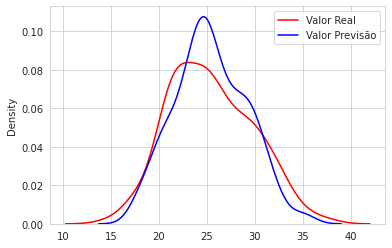

R2:  0.7226629519199024
MAE:  1.964064244290439
MSE:  5.352448636296927
RMSE:  2.3135359595858733


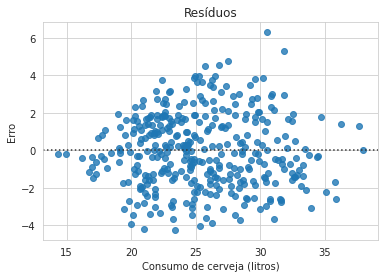

In [37]:
evaluate(Y, Y_predict)

A regressão Múltipla melhorou bastante a previsão, elevando o score para 0.72.

Mas será que ainda pode melhorar?

Vou testar outros algoritmos de regressão e avaliar  apertinência dos resultados.

##**Regressão Polinomial**

###Polinomial de 2 grau

In [38]:
# vou tentar o polinomial de grau 2 com as variáveis mais preditoras

X = cons_cerv.loc[:, ['Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 
                      'Final de Semana', 'dia_semana', 'Amp Termica']]
                      
Y = cons_cerv[['Consumo de cerveja (litros)']]

pr = PolynomialFeatures(degree=2)

X_new = pr.fit_transform(X)

lm = LinearRegression()
lm.fit(X_new, Y)
Y_hat = lm.predict(X_new)


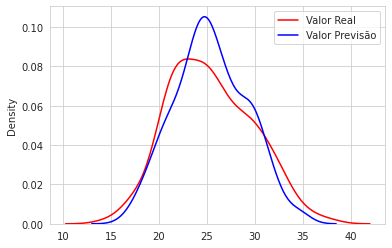

R2:  0.7352760667732001
MAE:  1.9117642466832514
MSE:  5.109022632222304
RMSE:  2.260314719728716


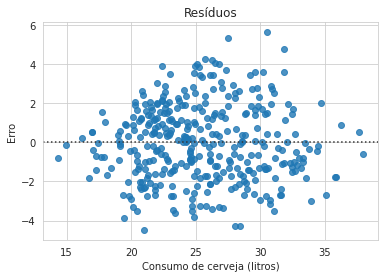

In [39]:
evaluate(Y, Y_hat)

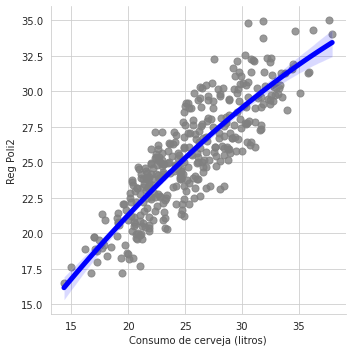

In [54]:
# Plotando regressão polinomial com lmplot, order=2

sns.lmplot(x='Consumo de cerveja (litros)', y='Reg Poli2', data=cons_cerv,
           order=2, ci=95, scatter_kws={'s': 50, 'color': 'gray'}, line_kws={'lw':5, 'color':'blue'})

###Polinomial de 3 grau

In [41]:
# vou tentar o polinomial de grau 3 com as variáveis mais preditoras

X = cons_cerv.loc[:, ['Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 
                      'Final de Semana', 'dia_semana', 'Amp Termica']]
                      
Y = cons_cerv[['Consumo de cerveja (litros)']]

pr3 = PolynomialFeatures(degree=3)

X_new3 = pr3.fit_transform(X)

lm = LinearRegression()
lm.fit(X_new3, Y)
Y_hat3 = lm.predict(X_new3)

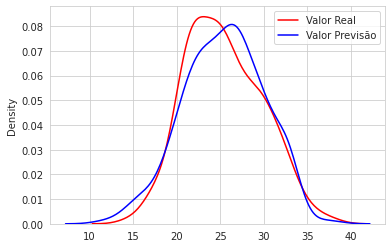

R2:  0.4731211226278178
MAE:  2.4560998266455245
MSE:  10.168465223838119
RMSE:  3.188803102080484


Text(0, 0.5, 'Erro')

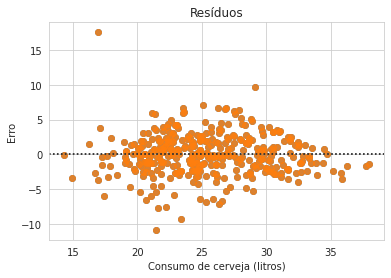

In [42]:
evaluate(Y, Y_hat3)

sns.residplot(cons_cerv['Consumo de cerveja (litros)'], Y_hat3)
plt.title('Resíduos')
plt.ylabel('Erro')

O uso da Regressão Polinomial de grau 2 obteve uma boa performance, com score de 0.73.

A polinomial de grau 3 diminuiu o score, overfitando o modelo

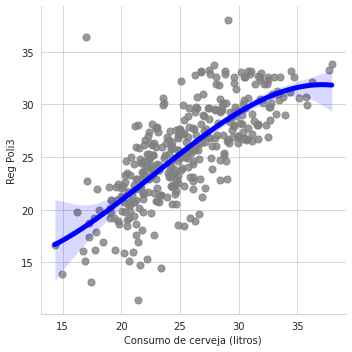

In [55]:
# Plotando regressão polinomial com lmplot, order=3

sns.lmplot(x='Consumo de cerveja (litros)', y= 'Reg Poli3', data= cons_cerv,
           order= 3, ci=95, scatter_kws={'s': 50, 'color': 'gray'}, line_kws={'lw':5, 'color':'blue'})


##**Regressão Ridge**

In [45]:
# Aplicando modelo com ridge regression

X = cons_cerv.loc[:, ['Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)', 
                      'Final de Semana', 'dia_semana', 'Amp Termica']]
                      
Y = cons_cerv[['Consumo de cerveja (litros)']]

rr = Ridge(alpha=0.01, normalize=True)

rr.fit(X, Y)
Y_rr = rr.predict(X)

rr.score(X, Y)


0.7225715667926056

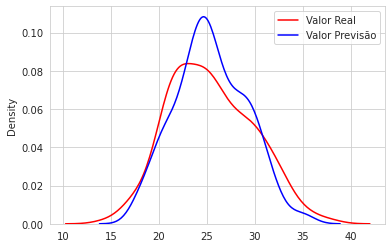

R2:  0.7225715667926056
MAE:  1.9637721437645237
MSE:  5.354212317721259
RMSE:  2.313917093960209


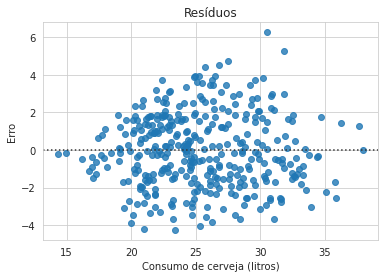

In [46]:
evaluate(Y, Y_rr)

##**Regressão Lasso**

In [47]:
# Aplicando modelo com Lasso regression

X = cons_cerv.loc[:, ['Temperatura Minima (C)', 'Temperatura Maxima (C)', 'Precipitacao (mm)',
                      'Final de Semana', 'dia_semana', 'Amp Termica']]

Y = cons_cerv[['Consumo de cerveja (litros)']]

lr = Lasso(alpha=0.01)

lr.fit(X, Y)
Y_lr = lr.predict(X)

lr.score(X, Y)

0.7226029798168793

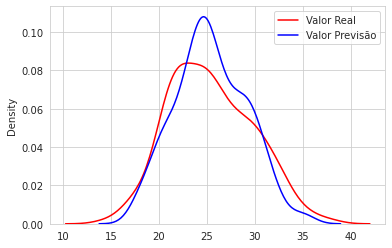

R2:  0.7226029798168793
MAE:  1.9637527012960094
MSE:  5.353606064066727
RMSE:  2.313786088657879


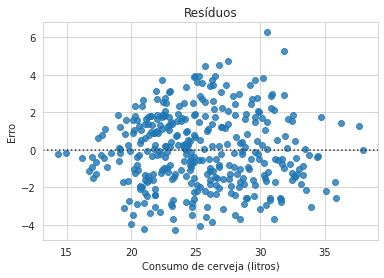

In [48]:
evaluate(Y, Y_lr)

##**Avaliando Os Resultados**

In [ ]:
# Montar um dataset comparando as predições para cada tipo de regressão
# Após escolher o melhor modelo, rodar com o dataset teste para extrair os valores de consumo estimado para os dias de carnaval

In [49]:
# Criando colunas no dataset para comparar valores reais com as previsões

cons_cerv['Reg Linear Simples'] = Y_predictlm
cons_cerv['Reg Multipla'] = Y_predict
cons_cerv['Reg Poli2'] = Y_hat
cons_cerv['Reg Poli3'] = Y_hat3
cons_cerv['Reg Ridge'] = Y_rr
cons_cerv['Reg Lasso'] = Y_lr

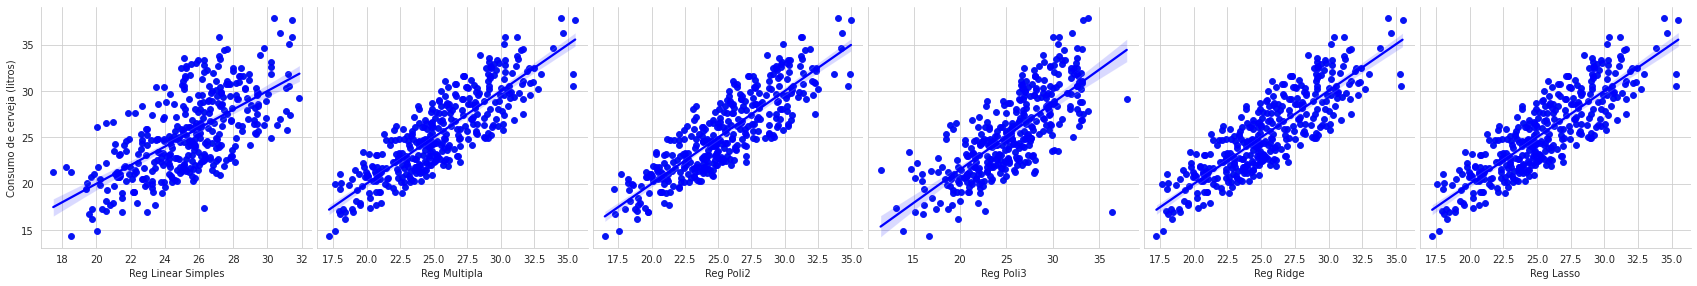

In [50]:

axl = sns.pairplot(cons_cerv, y_vars=['Consumo de cerveja (litros)'], x_vars=['Reg Linear Simples',	'Reg Multipla',	'Reg Poli2',
                                                                       'Reg Poli3',	'Reg Ridge',	'Reg Lasso'], height=4)
axl.map(sns.regplot, color='b')



Podemos observar, através dos gráficos acima, que a  performance dos modelos é bem similar, mas há uma leve melhora no resultado nos algoritmos de Regressão Polinomial de 2 grau e nos modelos Ridge e Lasso.

Quanto mais próximos (menos dispersos) os pontos previstos estão da reta de regressão, mais acurado é o resultado do modelo.

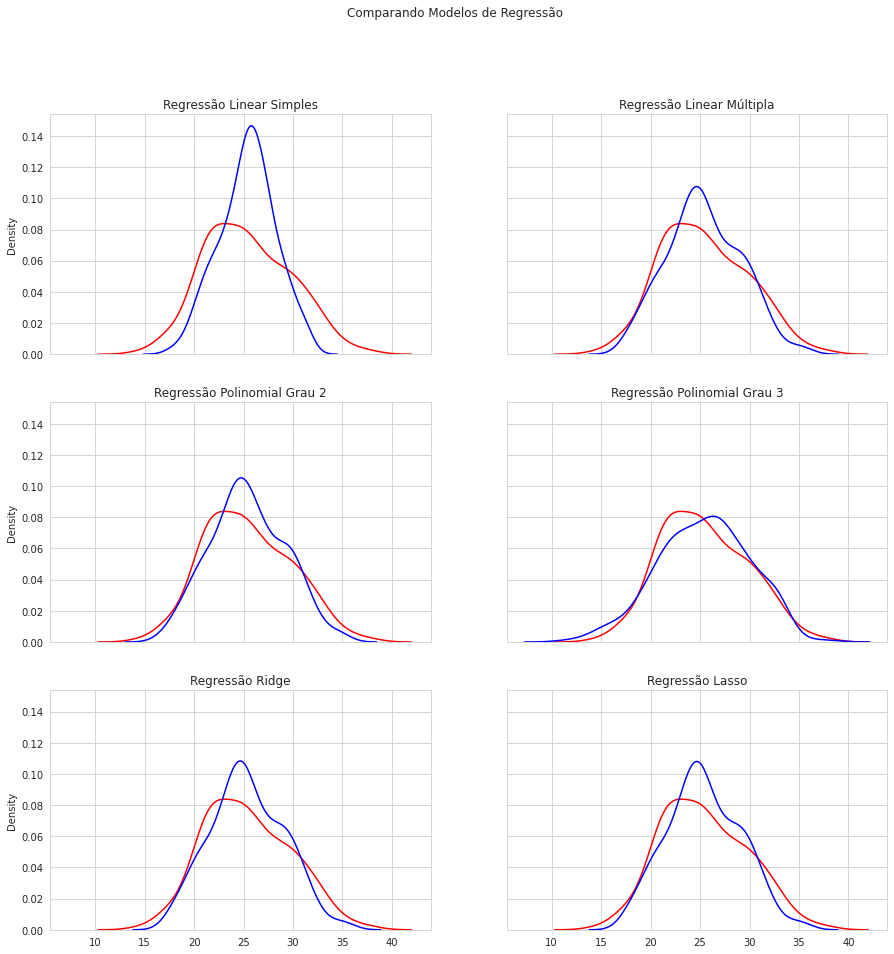

In [51]:
fig, axes = plt.subplots(3, 2 , sharex=True, sharey=True, figsize=(15,15))
fig.suptitle('Comparando Modelos de Regressão')

axes[0,0].set_title('Regressão Linear Simples')
axes[0,1].set_title('Regressão Linear Múltipla')
axes[1,0].set_title('Regressão Polinomial Grau 2')
axes[1,1].set_title('Regressão Polinomial Grau 3')
axes[2,0].set_title('Regressão Ridge')
axes[2,1].set_title('Regressão Lasso')

sns.distplot(Y, hist=False, color='r', label='Valor Real', ax=axes[0,0])
sns.distplot(Y_predictlm, hist=False, color='b', label='Valor Previsão', ax=axes[0,0])

sns.distplot(Y, hist=False, color='r', label='Valor Real', ax=axes[0,1])
sns.distplot(Y_predict, hist=False, color='b', label='Valor Previsão', ax=axes[0,1])

sns.distplot(Y, hist=False, color='r', label='Valor Real', ax=axes[1,0])
sns.distplot(Y_hat, hist=False, color='b', label='Valor Previsão', ax=axes[1,0])

sns.distplot(Y, hist=False, color='r', label='Valor Real', ax=axes[1,1])
sns.distplot(Y_hat3, hist=False, color='b', label='Valor Previsão', ax=axes[1,1])

sns.distplot(Y, hist=False, color='r', label='Valor Real', ax=axes[2,0])
sns.distplot(Y_rr, hist=False, color='b', label='Valor Previsão', ax=axes[2,0])

sns.distplot(Y, hist=False, color='r', label='Valor Real', ax=axes[2,1])
sns.distplot(Y_lr, hist=False, color='b', label='Valor Previsão', ax=axes[2,1])

plt.show()

Observar que o modelo de Regressão Polinomial Grau 2 apresentou o melhor fit entre as curvas real e previsão

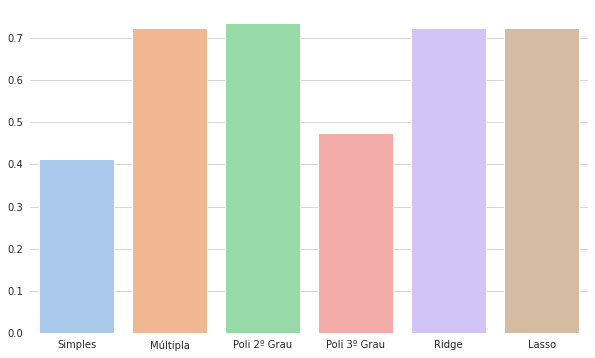

In [52]:
# Comparando a performance dos modelos com gráfico de barras

x =['Simples', 'Múltipla', 'Poli 2º Grau', 'Poli 3º Grau', 'Ridge', 'Lasso']
y = [r2_score(Y,Y_predictlm), r2_score(Y,Y_predict), r2_score(Y, Y_hat), r2_score(Y, Y_hat3),
     r2_score(Y, Y_rr), r2_score(Y, Y_lr)]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x= x, y= y, palette='pastel')
sns.despine(left=True, bottom=True)
plt.show()

As performances são muito semelhantes

In [53]:
# Apresentar um resumo das métricas utilizadas para avaliação dos modelos

Y = cons_cerv['Consumo de cerveja (litros)']

models = ['Regressão Linear Simples', 'Regressão Linear Múltipla', 'Regressão Polinomial Grau 2', 
'Regressão Polinomial Grau 3', 'Regressão Ridge', 'Regressão Lasso']

varv = [Y_predictlm, Y_predict, Y_hat, Y_hat3, Y_rr, Y_lr]

for i, mod in zip(varv, models):
  print(f'\n{mod}')
  print('R2: ', r2_score(Y, i))
  print('MAE: ', mean_absolute_error(Y, i))
  print('MSE: ', mean_squared_error(Y, i))
  print('RMSE: ', np.sqrt(mean_squared_error(Y, i)))



Regressão Linear Simples
R2:  0.413027909953363
MAE:  2.7642672738837044
MSE:  11.328230341613486
RMSE:  3.3657436535799166

Regressão Linear Múltipla
R2:  0.7226629519199024
MAE:  1.964064244290439
MSE:  5.352448636296927
RMSE:  2.3135359595858733

Regressão Polinomial Grau 2
R2:  0.7352760667732001
MAE:  1.9117642466832514
MSE:  5.109022632222304
RMSE:  2.260314719728716

Regressão Polinomial Grau 3
R2:  0.4731211226278178
MAE:  2.4560998266455245
MSE:  10.168465223838119
RMSE:  3.188803102080484

Regressão Ridge
R2:  0.7225715667926056
MAE:  1.9637721437645237
MSE:  5.354212317721259
RMSE:  2.313917093960209

Regressão Lasso
R2:  0.7226029798168793
MAE:  1.9637527012960094
MSE:  5.353606064066727
RMSE:  2.313786088657879


A Regressão Polinomial de 2º Grau é o modelo que apresentou maior score e menor erro médio.

O R2 deste modelo ficou em 0.73 e o MAE ficou em 1.91, isso quer dizer que o modelo é capaz de prever 73% da variabilidade dos dados com um erro de 1.91 litros em torno da média.

##**Qual é afinal o melhor dia para vender cerveja no carnaval?**

In [ ]:
# Agora que definimos qual o melhor modelo de regressão utilizado, vou aplicá-lo ao dataset com os dias de carnaval
# Como resultado teremos a previsão do consumo de cerveja para os dias escolhidos

X = cons_cerv_predict.loc[:, ['Temperatura Minima (C)', 'Temperatura Maxima (C)', 
                      'Precipitacao (mm)', 'Final de Semana', 'dia_semana', 'Amp Termica']]

Y = cons_cerv_predict[['Consumo de cerveja (litros)']]

mlpoli = PolynomialFeatures(degree=2)

X_new = mlpoli.fit_transform(X)

poli = LinearRegression()
poli.fit(X_new, Y)
Y_carnaval = poli.predict(X_new)


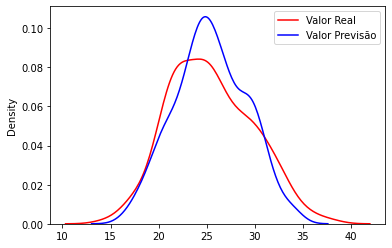

R2:  0.7177247474265607
MAE:  1.9329039130193457
MSE:  5.388698963129606
RMSE:  2.3213571382123876


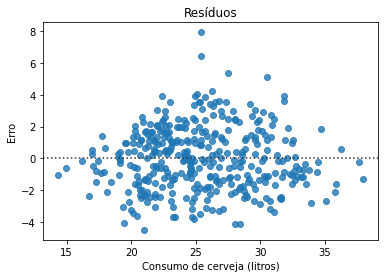

In [ ]:
evaluate(Y, Y_carnaval)

In [ ]:
# Mostrando os últimos 5 valores de Y_carnaval, que são os dados que precisamos prever

Y_carnaval[-5:]

array([[25.68420404],
       [31.83557123],
       [33.32189935],
       [26.56994623],
       [26.24182123]])

De acordo com a previsão do nosso modelo de regressão, o **melho dia para venda de cerveja será o dia 28/02**, domingo de carnaval, com um consumo de cerveja em litros previsto de: **33.3 l**